In [155]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [156]:
train = pd.read_csv("data/train.csv", encoding="utf-8")
test = pd.read_csv("data/test.csv", encoding="utf-8")

In [3]:
def headtail(data):
    print("The header of the data: \n")
    print("-----------------------------------------------------------")
    print("Number of rows: ", data.shape[0])
    print("Number of columns: ", data.shape[1])
    display(data.head())
    print("-----------------------------------------------------------")
    print("The tail of the data: \n")
    print("-----------------------------------------------------------")
    display(data.tail())
    print("-----------------------------------------------------------")
headtail(train)

The header of the data: 

-----------------------------------------------------------
Number of rows:  381109
Number of columns:  12


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


-----------------------------------------------------------
The tail of the data: 

-----------------------------------------------------------


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


-----------------------------------------------------------


In [4]:
def data_desc(data):
    print("Columns in the data: \n")
    display(data.columns)
    print("\n")
    print("Number of Null Values: \n")
    display(data.isna().sum())
    print("\n")
    print("Data 5-Point Summary\n")
    display(data.describe())
    print("\n")
    print("Data Information: \n")
    display(data.info())
data_desc(train)

Columns in the data: 



Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')



Number of Null Values: 



id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64



Data 5-Point Summary



,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000




Data Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


None

In [5]:
def remove_duplicates(data):
    print("Before Removing the Duplicates: ", data.shape)
    data.drop_duplicates(keep=False, inplace=True)
    print("After Removing the Duplicates: ", data.shape)
remove_duplicates(train)

Before Removing the Duplicates:  (381109, 12)
After Removing the Duplicates:  (381109, 12)


In [6]:
def detect_na(data):
  return data.isna().sum()
detect_na(train)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

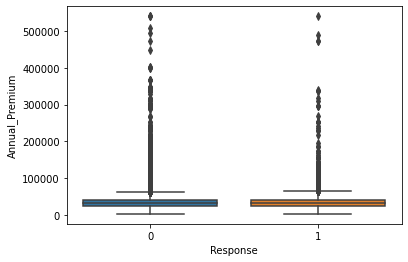

In [ ]:
# Many outlier in Annual Premium
sns.boxplot(x='Response', y='Annual_Premium', data=train)

In [134]:
def remove_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    print(IQR)
    print("Upper Limit: ", upper_bound)
    print("Lower Limit: ", lower_bound)
    
    index = data[(data[feature] >= upper_bound)|(data[feature] <= lower_bound)].index
    data.drop(index, inplace=True)
    #data[feature] = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data
train = remove_outliers(train, 'Age')
train

24.0
Upper Limit:  85.0
Lower Limit:  -11.0


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [135]:
train = remove_outliers(train, 'Annual_Premium')
train

14995.0
Upper Limit:  61892.5
Lower Limit:  1912.5


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [157]:
train = train.drop(columns=['id'], axis=1)
ID_test = test['id']
test = test.drop(columns=['id'], axis=1)

In [10]:
train['Region_Code'].value_counts()

28.0    99735
8.0     32068
46.0    19628
41.0    17941
15.0    13178
30.0    12179
29.0    10871
50.0    10187
3.0      9172
11.0     9116
36.0     8700
33.0     7613
47.0     7418
35.0     6883
6.0      6273
45.0     5570
37.0     5483
18.0     5115
48.0     4680
14.0     4647
39.0     4558
10.0     4364
21.0     4257
2.0      4038
13.0     4029
12.0     3188
7.0      3168
9.0      3094
27.0     2816
32.0     2786
43.0     2616
26.0     2584
17.0     2535
25.0     2491
24.0     2408
0.0      2019
16.0     2006
38.0     2006
31.0     1960
23.0     1958
20.0     1934
49.0     1824
4.0      1796
34.0     1656
19.0     1534
22.0     1298
40.0     1285
5.0      1275
1.0      1008
44.0      805
42.0      590
52.0      262
51.0      174
Name: Region_Code, dtype: int64

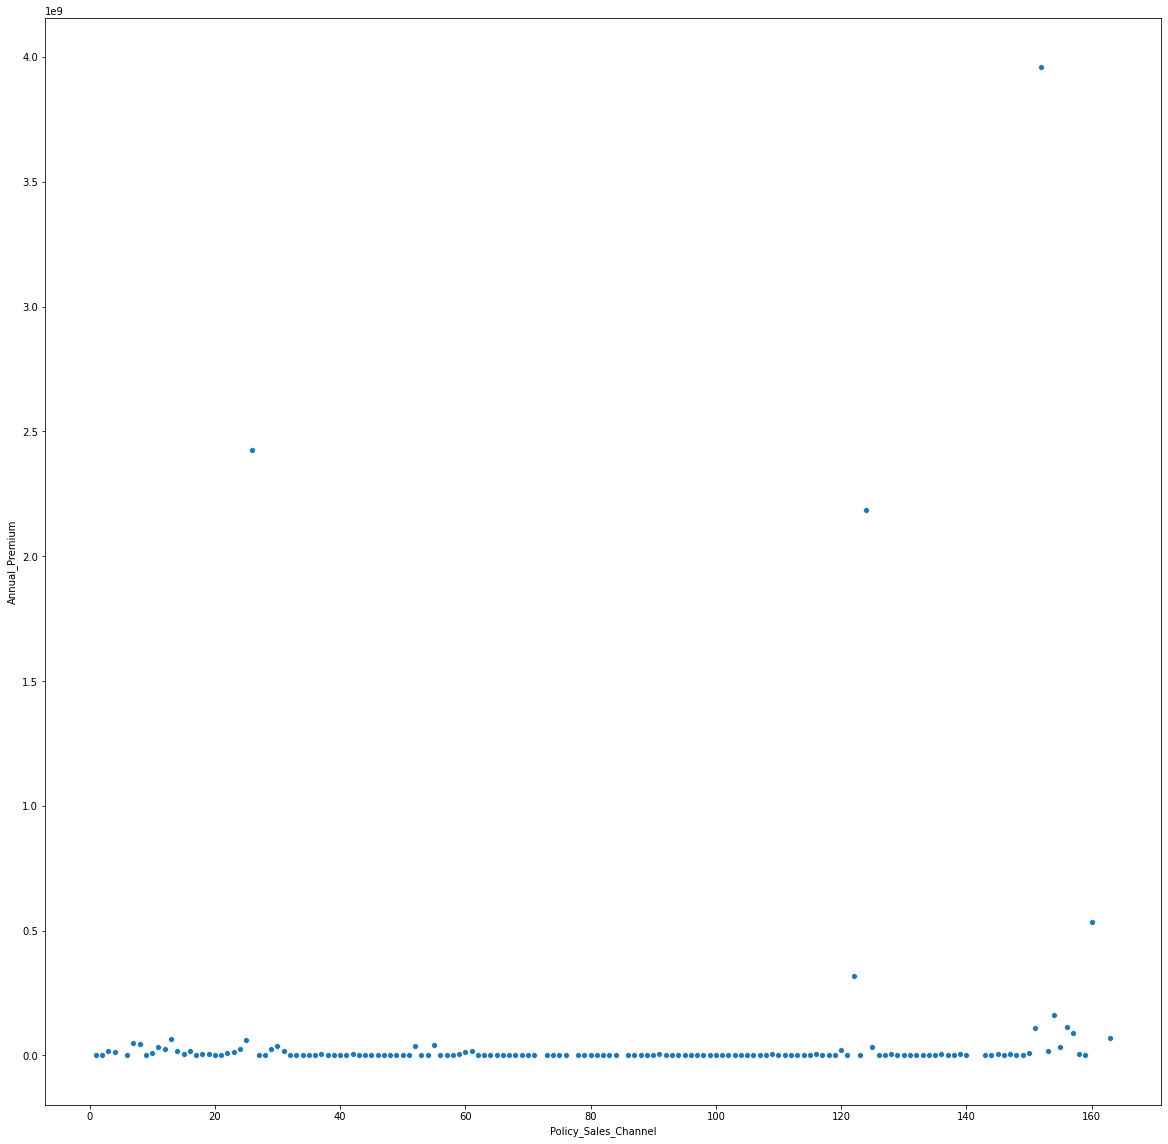

In [27]:
x = train.groupby('Policy_Sales_Channel')['Annual_Premium'].sum()
x = pd.DataFrame(x).reset_index()
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(x='Policy_Sales_Channel', y='Annual_Premium', data=x)

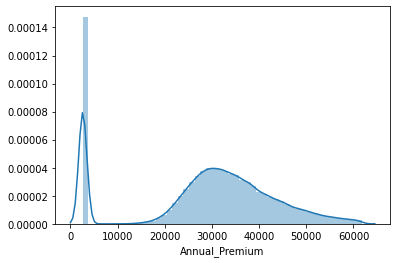

In [137]:
sns.distplot(train['Annual_Premium'])

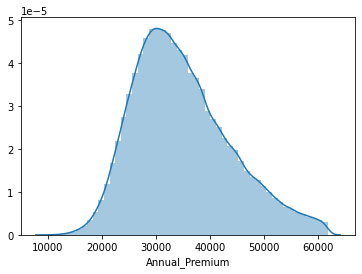

In [31]:
index = train[train['Annual_Premium']  <= 10000].index
train.drop(index, inplace=True)
sns.distplot(train['Annual_Premium'])

In [36]:
train['Policy_Sales_Channel'].max()

163.0

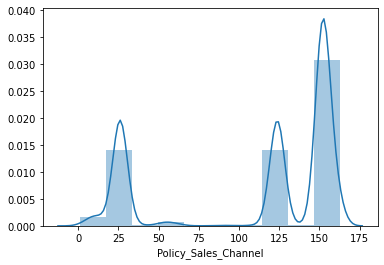

In [53]:
sns.distplot(train['Policy_Sales_Channel'], bins=10)

In [158]:
def Policy_Cat(x):
    if x>0 and x<50:
        return 1
    elif x>100 and x<140:
        return 1
    elif x>140 and x<175:
        return 2
    else:
        return 0
train['Policy_Category'] = train['Policy_Sales_Channel']
train['Policy_Category'] = train['Policy_Category'].apply(Policy_Cat)

test['Policy_Category'] = test['Policy_Sales_Channel']
test['Policy_Category'] = test['Policy_Category'].apply(Policy_Cat)
train['Policy_Category'].value_counts()

2    189829
1    186646
0      4634
Name: Policy_Category, dtype: int64

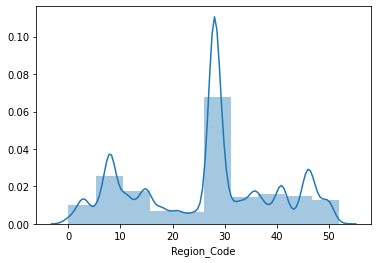

In [139]:
sns.distplot(train['Region_Code'], bins=10)

In [68]:
(train['Region_Code'].value_counts())

28.0    89958
8.0     28050
46.0    16844
41.0    15759
15.0    11024
30.0    10234
50.0     8968
29.0     8915
11.0     7650
3.0      7233
36.0     7114
47.0     6631
33.0     6243
35.0     5500
6.0      5486
45.0     4643
37.0     4622
18.0     4121
14.0     3864
10.0     3684
21.0     3577
2.0      3499
13.0     3483
39.0     3323
9.0      2604
12.0     2424
26.0     2238
32.0     2122
27.0     2116
25.0     2099
17.0     2038
43.0     1958
24.0     1897
7.0      1843
16.0     1599
23.0     1504
49.0     1384
34.0     1345
38.0     1342
4.0      1330
19.0     1210
5.0      1010
40.0     1009
22.0     1007
44.0      605
42.0      445
52.0      196
51.0      107
0.0        19
48.0       10
20.0        7
31.0        4
1.0         3
Name: Region_Code, dtype: int64

In [159]:
def Region_Category(x):
    if x==1.0 or x==31.0 or x==20.0 or x==48.0 or x==0.0 or x==51.0 or x==52.0 or x==42.0 or x==44.0:
        return 0
    elif x==30.0 or x==41.0 or x==15.0 or x==46.0 or x==8.0:
        return 1
    elif x==28.0:
        return 2
    else:
        return 3
train['Region_Category'] = train['Region_Code']
train['Region_Category'] = train['Region_Category'].apply(Region_Category)
test['Region_Category'] = test['Region_Code']
test['Region_Category'] = test['Region_Category'].apply(Region_Category)
train['Region_Category'].value_counts()

3    163852
2    106415
1     97388
0     13454
Name: Region_Category, dtype: int64

In [95]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Category,Region_Category
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,2
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,3
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,2
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,2,3
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,1,3
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,2,3
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,2,1
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1,3


In [99]:
train.groupby('Response')['Previously_Insured'].count()

Response
0    269251
1     36649
Name: Previously_Insured, dtype: int64

In [160]:
#train['Region_Code'] = train['Region_Code'].groupby(train['Region_Code']).transform('count')
#test['Region_Code'] = test['Region_Code'].groupby(test['Region_Code']).transform('count')
#train

#train['Region_Premium_Percentage'] = train.groupby('Region_Code')['Annual_Premium'].transform('sum')
#test['Region_Premium_Percentage'] = test.groupby('Region_Code')['Annual_Premium'].transform('sum')

train['Region_Previously_Insured'] = train.groupby('Region_Code')['Previously_Insured'].transform('mean')
test['Region_Previously_Insured'] = test.groupby('Region_Code')['Previously_Insured'].transform('mean')

#train['Damage_Insured'] = train.groupby('Previously_Insured')['Vehicle_Damage'].transform('count')
#test['Damage_Insured'] = test.groupby('Previously_Insured')['Vehicle_Damage'].transform('count')

#train['Region_Damage'] = train.groupby('Vehicle_Damage')['Region_Code'].transform('mean')
#test['Region_Damage'] = test.groupby('Vehicle_Damage')['Region_Code'].transform('median')

train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Category,Region_Category,Region_Previously_Insured
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,2,0.311817
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,3,0.488704
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,2,0.311817
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,2,3,0.619367
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,2,1,0.564694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,1,3,0.411287
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,2,3,0.432649
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,2,1,0.674268
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1,3,0.609662


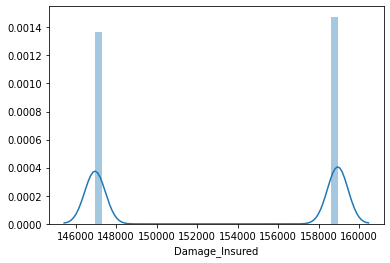

In [102]:
sns.distplot(train['Damage_Insured'])

In [161]:
def normalisation(data, feature):
    data[feature] = (data[feature].max() - data[feature])/(data[feature].max() - data[feature].min())
    return data[feature]
def log_transformation(data, feature):
    data[feature] = np.log(data[feature])
    return data[feature]

normalisation(train, 'Vintage')
#normalisation(train, 'Damage_Insured')
log_transformation(train, 'Age')
log_transformation(train, 'Annual_Premium')

normalisation(test, 'Vintage')
#normalisation(test, 'Damage_Insured')
log_transformation(test, 'Age')
log_transformation(test, 'Annual_Premium')

0         10.485312
1         10.427091
2         10.597884
3         10.528249
4         10.986935
            ...    
127032    10.337443
127033    10.264652
127034    10.302331
127035    11.048904
127036    10.237349
Name: Annual_Premium, Length: 127037, dtype: float64

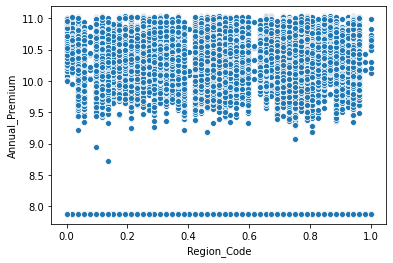

In [ ]:
sns.scatterplot(x='Region_Code', y='Annual_Premium', data=train)

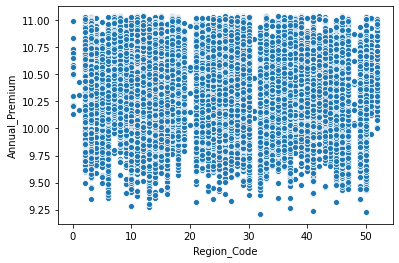

In [106]:
sns.scatterplot(x='Region_Code', y='Annual_Premium', data=train)

In [162]:
normalisation(train, 'Age')
normalisation(train, 'Annual_Premium')
normalisation(test, 'Age')
normalisation(test, 'Annual_Premium')

0         0.497008
1         0.508225
2         0.475318
3         0.488735
4         0.400357
            ...   
127032    0.525498
127033    0.539523
127034    0.532264
127035    0.388417
127036    0.544784
Name: Annual_Premium, Length: 127037, dtype: float64

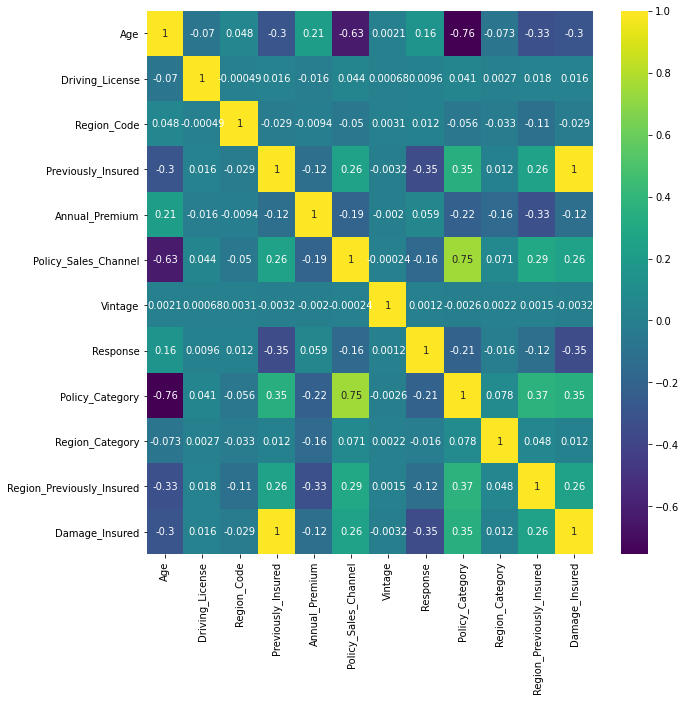

In [105]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='viridis', ax=ax)

In [109]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Category,Region_Category,Region_Previously_Insured,Damage_Insured
0,Male,0.450585,1,28.0,0,> 2 Years,Yes,0.233332,26.0,0.283737,1,1,2,0.316437,0.0
1,Male,0.069740,1,3.0,0,1-2 Year,No,0.336243,26.0,0.401384,0,1,3,0.518734,0.0
2,Male,0.404624,1,28.0,0,> 2 Years,Yes,0.263442,26.0,0.941176,1,1,2,0.316437,0.0
3,Male,0.966002,1,11.0,1,< 1 Year,No,0.423243,152.0,0.332180,0,2,3,0.661307,1.0
4,Female,0.741086,1,41.0,1,< 1 Year,No,0.445208,152.0,0.899654,0,2,1,0.590393,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,0.088324,1,26.0,1,1-2 Year,No,0.394283,26.0,0.730104,0,1,3,0.417784,1.0
381105,Male,0.717463,1,37.0,1,< 1 Year,No,0.239305,152.0,0.581315,0,2,3,0.443964,1.0
381106,Male,0.966002,1,30.0,1,< 1 Year,No,0.310950,160.0,0.477509,0,2,1,0.708521,1.0
381107,Female,0.147245,1,14.0,0,> 2 Years,Yes,0.179585,124.0,0.778547,0,1,3,0.646222,0.0


In [163]:
import category_encoders as ce
dummy_cols = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Category', 'Region_Category']

encoder = ce.one_hot.OneHotEncoder(cols=dummy_cols)
df = encoder.fit_transform(train)
test = encoder.fit_transform(test)
df

,Gender_1,Gender_2,Age,Driving_License,Region_Code,Previously_Insured_1,Previously_Insured_2,Vehicle_Age_1,Vehicle_Age_2,Vehicle_Age_3,...,Vintage,Response,Policy_Category_1,Policy_Category_2,Policy_Category_3,Region_Category_1,Region_Category_2,Region_Category_3,Region_Category_4,Region_Previously_Insured
0,1,0,0.455078,1,28.0,1,0,1,0,0,...,0.283737,1,1,0,0,1,0,0,0,0.311817
1,1,0,0.077349,1,3.0,1,0,0,1,0,...,0.401384,0,1,0,0,0,1,0,0,0.488704
2,1,0,0.409493,1,28.0,1,0,1,0,0,...,0.941176,1,1,0,0,1,0,0,0,0.311817
3,1,0,0.966280,1,11.0,0,1,0,0,1,...,0.332180,0,0,1,0,0,1,0,0,0.619367
4,0,1,0.743204,1,41.0,0,1,0,0,1,...,0.899654,0,0,1,0,0,0,1,0,0.564694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0,0.095780,1,26.0,0,1,0,1,0,...,0.730104,0,1,0,0,0,1,0,0,0.411287
381105,1,0,0.719773,1,37.0,0,1,0,0,1,...,0.581315,0,0,1,0,0,1,0,0,0.432649
381106,1,0,0.966280,1,30.0,0,1,0,0,1,...,0.477509,0,0,1,0,0,0,1,0,0.674268
381107,0,1,0.154220,1,14.0,1,0,1,0,0,...,0.778547,0,1,0,0,0,1,0,0,0.609662


In [164]:
test

,Gender_1,Gender_2,Age,Driving_License,Region_Code,Previously_Insured_1,Previously_Insured_2,Vehicle_Age_1,Vehicle_Age_2,Vehicle_Age_3,...,Policy_Sales_Channel,Vintage,Policy_Category_1,Policy_Category_2,Policy_Category_3,Region_Category_1,Region_Category_2,Region_Category_3,Region_Category_4,Region_Previously_Insured
0,1,0,0.845780,1,11.0,1,0,1,0,0,...,152.0,0.851211,1,0,0,1,0,0,0,0.627907
1,1,0,0.520950,1,28.0,0,1,0,1,0,...,7.0,0.650519,0,1,0,0,1,0,0,0.309217
2,1,0,0.409493,1,28.0,0,1,0,1,0,...,124.0,0.346021,0,1,0,0,1,0,0,0.309217
3,1,0,0.873993,1,27.0,1,0,1,0,0,...,152.0,0.387543,1,0,0,1,0,0,0,0.378378
4,1,0,0.792591,1,28.0,1,0,1,0,0,...,152.0,0.006920,1,0,0,0,1,0,0,0.309217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,0,1,0.818674,1,37.0,1,0,1,0,0,...,152.0,0.840830,1,0,0,1,0,0,0,0.429967
127033,0,1,0.556400,1,28.0,0,1,0,1,0,...,122.0,0.463668,0,1,0,0,1,0,0,0.309217
127034,1,0,0.966280,1,46.0,1,0,1,0,0,...,152.0,0.778547,1,0,0,0,0,1,0,0.533747
127035,1,0,0.124382,1,28.0,1,0,0,1,0,...,26.0,0.117647,0,1,0,0,1,0,0,0.309217


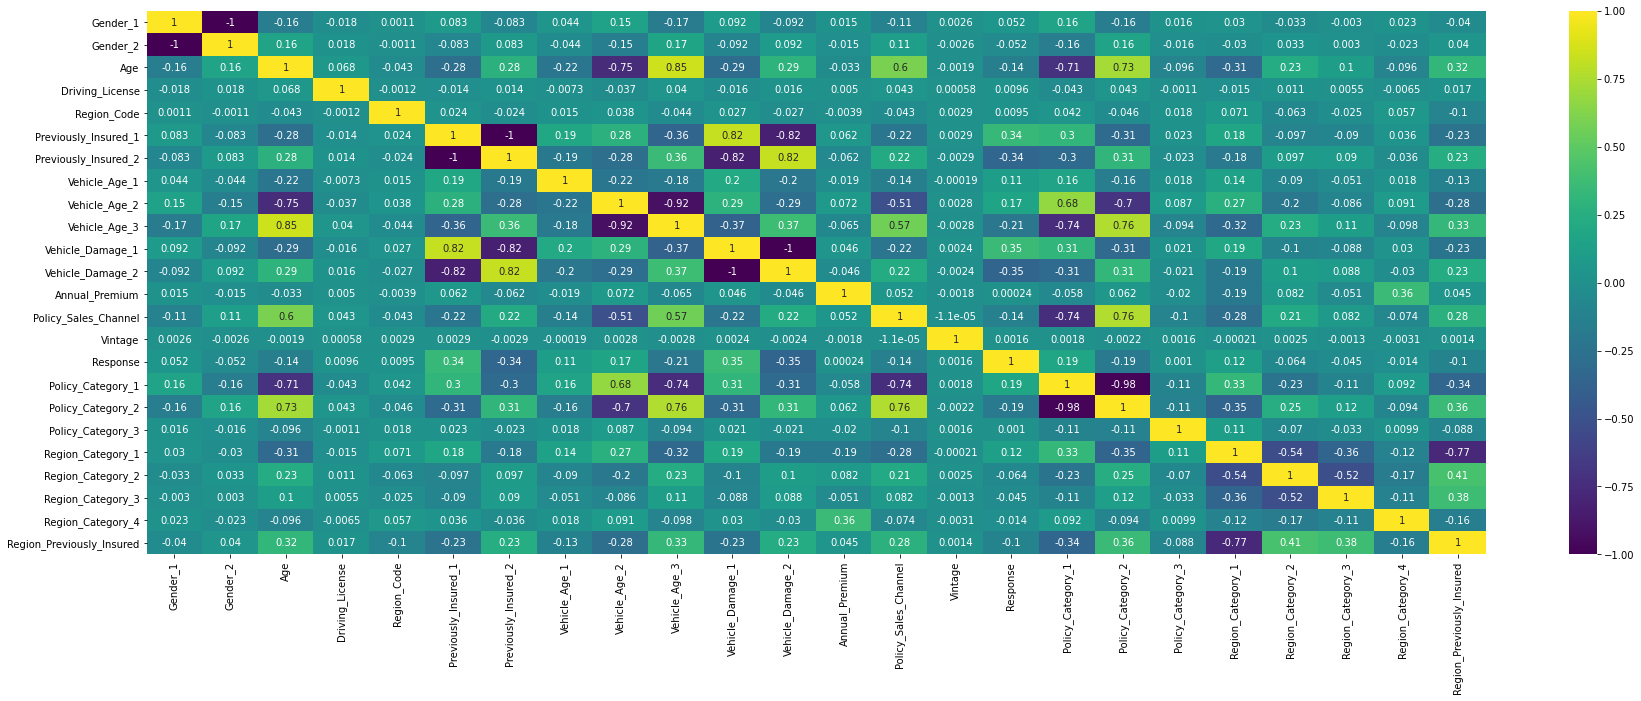

In [146]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', ax=ax)

In [ ]:
#df = df.drop(columns=['Vehicle_Age_0', 'Vehicle_Age_2', ])
#test = test.drop(columns=['Vehicle_Age_0', 'Vehicle_Age_2', ])

In [ ]:
df_binary

,Gender_0,Gender_1,Age,Driving_License_0,Driving_License_1,Region_Code,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1,Vehicle_Damage_0,Vehicle_Damage_1,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Region_Previously_Insured
0,0,1,0.450585,0,1,0.461538,0,1,0,0,1,0.134633,0.422178,0.283737,1,0.310393
1,0,1,0.069740,0,1,0.942308,0,1,1,1,0,0.194013,0.422178,0.401384,0,0.488443
2,0,1,0.404624,0,1,0.461538,0,1,0,0,1,0.152006,0.422178,0.941176,1,0.310393
3,0,1,0.966002,0,1,0.788462,1,0,1,1,0,0.244212,0.000000,0.332180,0,0.618912
4,1,0,0.741086,0,1,0.211538,1,0,1,1,0,0.256886,0.000000,0.899654,0,0.564350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,0.088324,0,1,0.500000,1,0,1,1,0,0.227502,0.422178,0.730104,0,0.410991
381105,0,1,0.717463,0,1,0.288462,1,0,1,1,0,0.138080,0.000000,0.581315,0,0.432610
381106,0,1,0.966002,0,1,0.423077,1,0,1,1,0,0.179419,0.837418,0.477509,0,0.674193
381107,1,0,0.147245,0,1,0.730769,0,1,0,0,1,0.103621,0.456006,0.778547,0,0.608995


In [ ]:
test

,Gender_0,Gender_1,Age,Driving_License_0,Driving_License_1,Region_Code,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1,Vehicle_Damage_0,Vehicle_Damage_1,Annual_Premium,Policy_Sales_Channel,Vintage,Region_Premium_Percentage
0,0,1,0.845780,0,1,0.788462,0,1,0,0,1,0.497008,0.000000,0.851211,8.606266e+07
1,0,1,0.520950,0,1,0.461538,1,0,1,1,0,0.508225,0.987527,0.650519,1.370901e+09
2,0,1,0.409493,0,1,0.461538,1,0,1,1,0,0.475318,0.456771,0.346021,1.370901e+09
3,0,1,0.873993,0,1,0.480769,0,1,0,1,0,0.488735,0.000000,0.387543,1.972226e+07
4,0,1,0.792591,0,1,0.461538,0,1,0,0,1,0.400357,0.000000,0.006920,1.370901e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0.818674,0,1,0.288462,0,1,0,0,1,0.525498,0.000000,0.840830,5.226717e+07
127033,1,0,0.556400,0,1,0.461538,1,0,1,1,0,0.539523,0.926058,0.463668,1.370901e+09
127034,0,1,0.966280,0,1,0.115385,0,1,0,0,1,0.532264,0.000000,0.778547,1.772839e+08
127035,0,1,0.124382,0,1,0.461538,0,1,1,0,1,0.388417,0.398878,0.117647,1.370901e+09


In [165]:
X = df.drop(columns=['Response'], axis=1)
y = df['Response']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [167]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (468408, 23)
After OverSampling, the shape of train_y: (468408,) 

After OverSampling, counts of label '1': 234204
After OverSampling, counts of label '0': 234204


In [168]:
X_train

,Gender_1,Gender_2,Age,Driving_License,Region_Code,Previously_Insured_1,Previously_Insured_2,Vehicle_Age_1,Vehicle_Age_2,Vehicle_Age_3,...,Policy_Sales_Channel,Vintage,Policy_Category_1,Policy_Category_2,Policy_Category_3,Region_Category_1,Region_Category_2,Region_Category_3,Region_Category_4,Region_Previously_Insured
55914,1,0,0.653902,1,29.0,1,0,0,1,0,...,124.0,0.553633,1,0,0,0,1,0,0,0.593583
179876,1,0,0.300859,1,28.0,1,0,1,0,0,...,26.0,0.048443,1,0,0,1,0,0,0,0.311817
300095,0,1,0.818674,1,28.0,0,1,0,0,1,...,152.0,0.626298,0,1,0,1,0,0,0,0.311817
60078,1,0,0.276173,1,38.0,0,1,0,1,0,...,124.0,0.173010,1,0,0,0,1,0,0,0.333169
312426,1,0,0.792591,1,42.0,1,0,0,0,1,...,152.0,0.477509,0,1,0,0,0,0,1,0.443316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0.873993,1,36.0,0,1,0,0,1,...,152.0,0.041522,0,1,0,0,1,0,0,0.483006
365838,1,0,0.288406,1,35.0,1,0,0,1,0,...,124.0,0.003460,1,0,0,0,1,0,0,0.550274
131932,0,1,0.934129,1,2.0,1,0,0,0,1,...,152.0,0.771626,0,1,0,0,1,0,0,0.485141
146867,1,0,0.455078,1,32.0,0,1,0,1,0,...,156.0,0.858131,0,1,0,0,1,0,0,0.474704


In [169]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
y_pred = lr.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7799183821707523

Feature: 0, Score: -0.73149
Feature: 1, Score: -0.87889
Feature: 2, Score: 1.78877
Feature: 3, Score: -0.19658
Feature: 4, Score: -0.00042
Feature: 5, Score: 0.72219
Feature: 6, Score: -1.66509
Feature: 7, Score: -0.27382
Feature: 8, Score: -0.24020
Feature: 9, Score: -1.26719
Feature: 10, Score: 0.39928
Feature: 11, Score: -2.27001
Feature: 12, Score: 0.46375
Feature: 13, Score: -0.00154
Feature: 14, Score: 0.18363
Feature: 15, Score: 0.20218
Feature: 16, Score: -0.24680
Feature: 17, Score: -0.46130
Feature: 18, Score: 0.12740
Feature: 19, Score: -0.42841
Feature: 20, Score: -0.34941
Feature: 21, Score: -0.23333
Feature: 22, Score: 0.35767
Feature: 23, Score: 0.72219
Feature: 24, Score: -1.66509


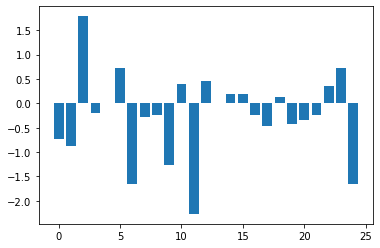

In [119]:
from matplotlib import pyplot
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [120]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
lr.fit(X_train_res, y_train_res)
y_pred = lr.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6808705155126628

In [170]:
lr = DecisionTreeClassifier(max_depth=4)
lr.fit(X_train_res, y_train_res)
y_pred = lr.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7916284189387067

In [171]:
df = pd.DataFrame({'Predictions':y_pred})
df['Predictions'].value_counts()

0    66494
1    47839
Name: Predictions, dtype: int64

In [172]:
preds = lr.predict(test)

In [173]:
submission = pd.DataFrame({'id':ID_test, 'Response':preds}).to_csv("dtree.csv", index=False)